In [24]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [26]:
df.drop(columns=['User ID','Gender'],inplace=True)

In [27]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [28]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [30]:
X = df.iloc[:,:2].values
y = df.iloc[:,-1].values

In [10]:
X = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=2)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
y_pred = knn.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.925

In [16]:
scores = []
from sklearn.metrics import accuracy_score

for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train,y_train)

    y_pred = knn.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))

In [17]:
scores

[0.8875, 0.8625, 0.925, 0.8625, 0.8875, 0.875, 0.9, 0.875, 0.9125]

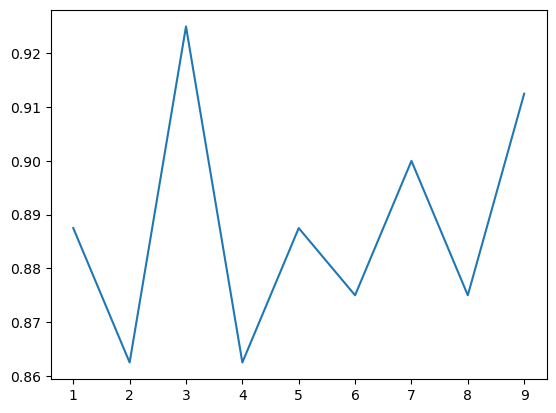

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(1,10),scores)

### Creating Numpy meshgrids

In [19]:
a=np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b=np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)

In [20]:
XX, YY = np.meshgrid(a,b)

### Classifying every point on the meshgrid

In [21]:
input_array = np.array([XX.ravel(), YY.ravel()]).T

In [22]:
labels=knn.predict(input_array)

In [23]:
# Example
m=np.array([[1,2,3],[4,5,6]])
n=np.array([[7,8,9],[0,0,0]])

np.array([m.ravel(), n.ravel()])

array([[1, 2, 3, 4, 5, 6],
       [7, 8, 9, 0, 0, 0]])

### Plotting the array into an image

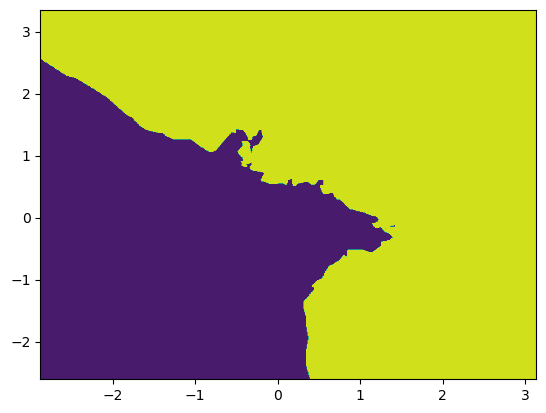

In [251]:
import matplotlib.pyplot as plt
plt.contourf(XX,YY,labels.reshape(XX.shape))

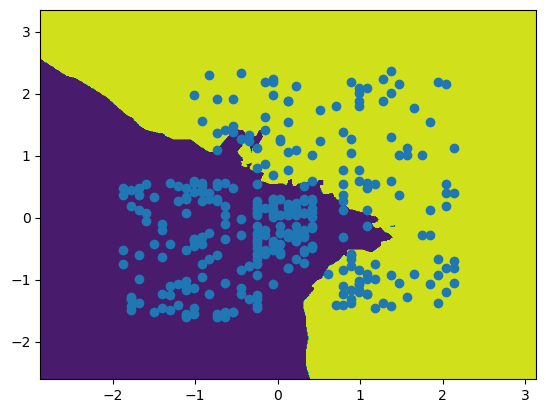

In [257]:
plt.contourf(XX,YY,labels.reshape(XX.shape))
plt.scatter(X_train[:,0], X_train[:,1])

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
confusion_matrix(y_test,y_pred)

NameError: name 'y_test' is not defined

In [18]:
print(f"Precision score of KNN model is {round(precision_score(y_test, y_pred),2)}")
print(f"Recall score of KNN model is {round(recall_score(y_test, y_pred),2)}")
print(f"F1 score of KNN model is {round(f1_score(y_test, y_pred),2)}")

Precision score of KNN model is 0.93
Recall score of KNN model is 0.88
F1 score of KNN model is 0.9


In [21]:
print(f"{classification_report(y_test,y_pred)}")

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        48
           1       0.93      0.88      0.90        32

    accuracy                           0.93        80
   macro avg       0.93      0.92      0.92        80
weighted avg       0.93      0.93      0.92        80

